In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay as cmd, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.datasets import load_digits

sns.set_theme()

In [2]:
# Handling categorical data Label encoding
data = [[10, 'red'], [20, 'blue'], [12, 'red'], [16, 'green'], [22, 'blue']]
df = pd.DataFrame(data, columns=['Length', 'Color'])
encoder = LabelEncoder()
df['Color'] = encoder.fit_transform(df['Color'])
df.head()

,Length,Color
0,10,2
1,20,0
2,12,2
3,16,1
4,22,0


In [3]:
# Handling categorical data with One-Hot Encoding
data = [[10, 'red'], [20, 'blue'], [12, 'red'], [16, 'green'], [22, 'blue']]
df = pd.DataFrame(data, columns=['Length', 'Color'])
df = pd.get_dummies(df, columns=['Color'])
df.head()

,Length,Color_blue,Color_green,Color_red
0,10,False,False,True
1,20,True,False,False
2,12,False,False,True
3,16,False,True,False
4,22,True,False,False


In [4]:
!wget -P sample_data/ https://raw.githubusercontent.com/jeffprosise/Practical-Machine-Learning/main/Chapter%203/Data/titanic.csv

--2024-05-21 01:28:03--  https://raw.githubusercontent.com/jeffprosise/Practical-Machine-Learning/main/Chapter%203/Data/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘sample_data/titanic.csv’

titanic.csv         100%[===================>]  58.89K   320KB/s    in 0.2s    

2024-05-21 01:28:04 (320 KB/s) - ‘sample_data/titanic.csv’ saved [60302/60302]



In [5]:
df = pd.read_csv('sample_data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#drop rows with missing values
df = df[['Survived', 'Age', 'Sex', 'Pclass']]
df = pd.get_dummies(df, columns=['Sex', 'Pclass'])
df.dropna(inplace=True)
df.head()

,Survived,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,False,True,False,False,True
1,1,38.0,True,False,True,False,False
2,1,26.0,True,False,False,False,True
3,1,35.0,True,False,True,False,False
4,0,35.0,False,True,False,False,True


In [8]:
# splitting the data
x = df.drop(columns=["Survived"], axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.2, stratify=y, random_state=0)

In [10]:
model = LogisticRegression(random_state=0)
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.8024475524475524

In [11]:
cross_val_score(model, x, y, cv=5).mean()

0.7857480547621394

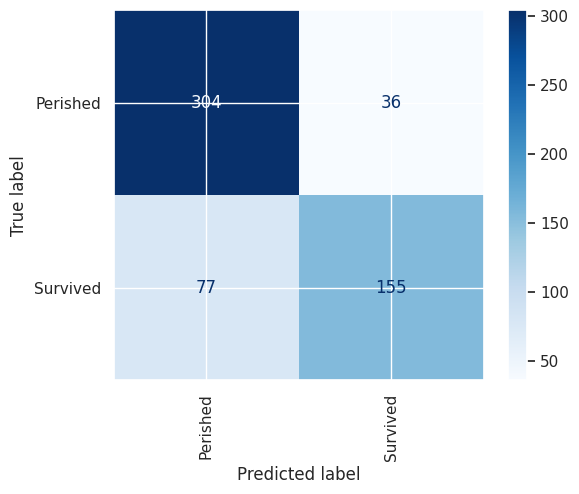

In [12]:
# confusion matrix
cmd.from_estimator(model, X_test, y_test, display_labels=["Perished", "Survived"], cmap="Blues", xticks_rotation="vertical")

In [13]:
# computing precision, recall, sensitivity, and specificity
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
sensitivity = recall
specificity = recall_score(y_test, y_pred, pos_label=0)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')

Precision: 0.8115183246073299
Recall: 0.6681034482758621
Sensitivity: 0.6681034482758621
Specificity: 0.8941176470588236


In [14]:
# make prediction for a female
female = pd.DataFrame({ 'Age': [30], 'Sex_female': [1], 'Sex_male': [0], 'Pclass_1': [1], 'Pclass_2': [0], 'Pclass_3': [0] })
model.predict(female)[0]

1

In [15]:
# probability that the female will survive
probability = model.predict_proba(female)[0][1]
print(f'Probability of survival: {probability:.1%}')

Probability of survival: 87.9%


In [16]:
# prediction for male
male = pd.DataFrame({ 'Age': [60], 'Sex_female': [0], 'Sex_male': [1],
'Pclass_1': [0], 'Pclass_2': [0], 'Pclass_3': [1] })
probability = model.predict_proba(male)[0][1]
print(f'Probability of survival: {probability:.1%}')

Probability of survival: 4.4%


In [18]:
df = pd.read_csv('sample_data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [20]:
x = df.drop(columns=["Time", "Class"], axis=1)
y = df["Class"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

In [21]:
# using LogisticRegression
lr_model = LogisticRegression(random_state=0, max_iter=5000)
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=5000, random_state=0)

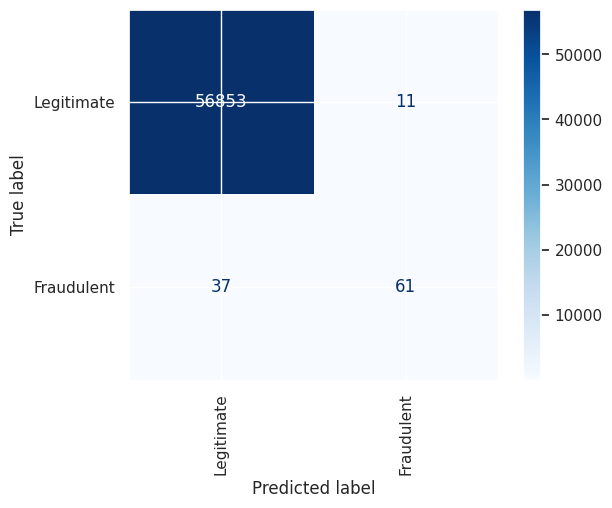

In [22]:
%matplotlib inline
labels = ["Legitimate", "Fraudulent"]
cmd.from_estimator(lr_model, x_test, y_test, display_labels=labels, cmap="Blues", xticks_rotation="vertical")

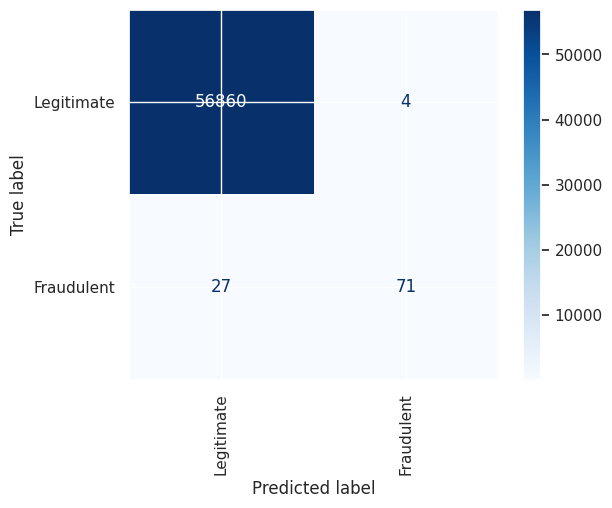

In [23]:
# using a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(x_train, y_train)

cmd.from_estimator(rf_model, x_test, y_test, display_labels=labels, cmap="Blues", xticks_rotation="vertical")

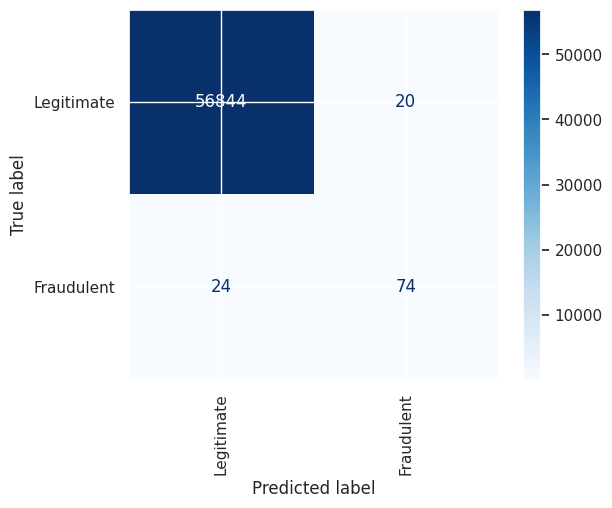

In [24]:
# using a GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(random_state=0)
gbm_model.fit(x_train, y_train)

cmd.from_estimator(gbm_model, x_test, y_test, display_labels=labels, xticks_rotation="vertical", cmap="Blues")

In [25]:
# evaluating RF model
y_pred = rf_model.predict(x_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
sensitivity = recall
specificity = recall_score(y_test, y_pred, pos_label=0)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')

Precision: 0.9466666666666667
Recall: 0.7244897959183674
Sensitivity: 0.7244897959183674
Specificity: 0.9999296567248172


In [26]:
digits = load_digits()
print('digits.images: ' + str(digits.images.shape))
print('digits.target: ' + str(digits.target.shape))

digits.images: (1797, 8, 8)
digits.target: (1797,)


In [27]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

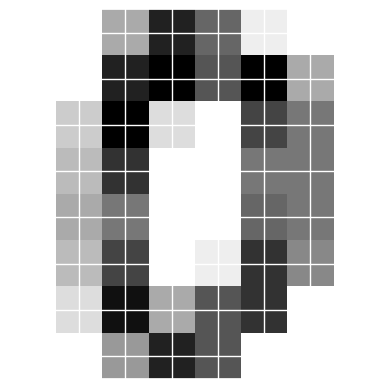

In [28]:
%matplotlib inline

plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)

In [29]:
digits.target[0]

0

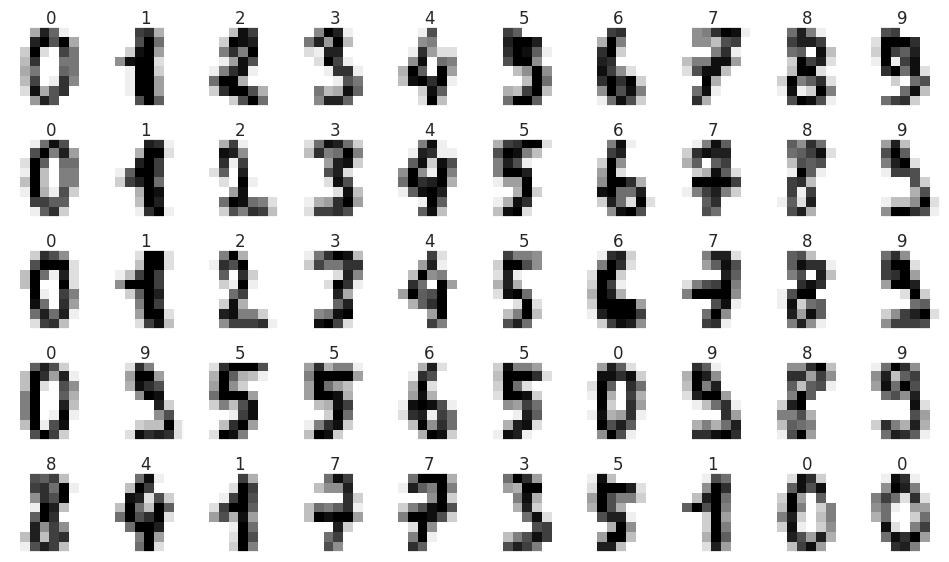

In [30]:
# Plot the first 50 images
fig, axes = plt.subplots(5, 10, figsize=(12,7), subplot_kw={'xticks' : [], 'yticks' : []})
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap=plt.cm.gray_r)
    ax.text(0.45, 1.05, str(digits.target[i]), transform=ax.transAxes)

(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

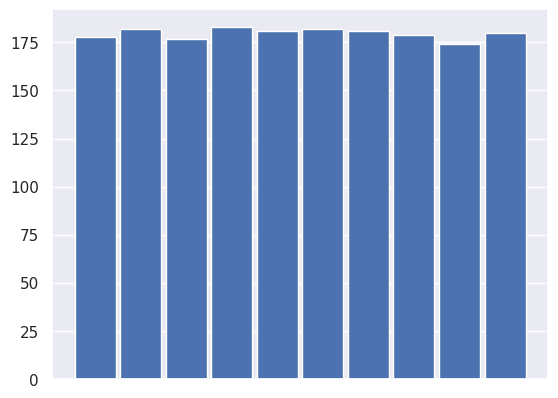

In [31]:
# visualize distribution of the samples
plt.xticks([])
plt.hist(digits.target, rwidth=0.9)

In [32]:
digits.data.shape

(1797, 64)

In [33]:
# build a LogisticRegression model
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)
model = LogisticRegression(max_iter=5000)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9694444444444444

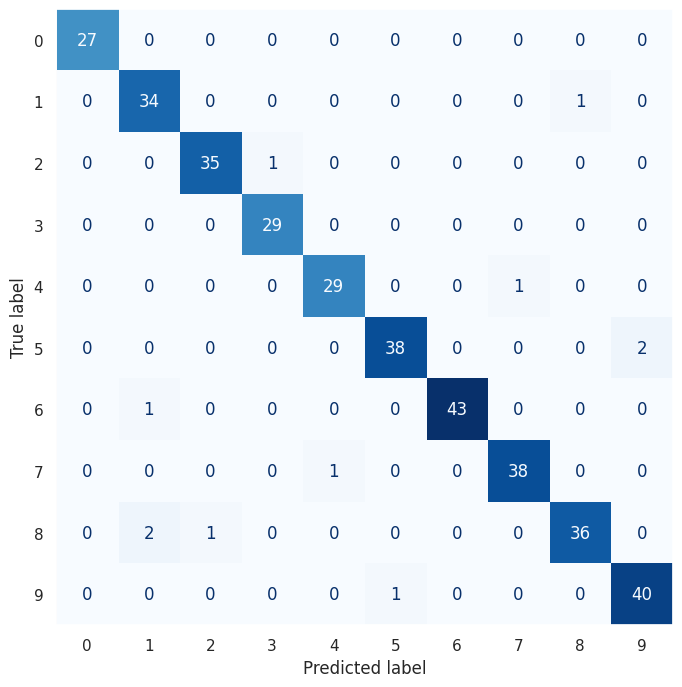

In [34]:
# confusion matrix
fig, ax = plt.subplots(figsize=(8,8))
ax.grid(False)

cmd.from_estimator(model, x_test, y_test, cmap="Blues", colorbar=False, ax=ax)

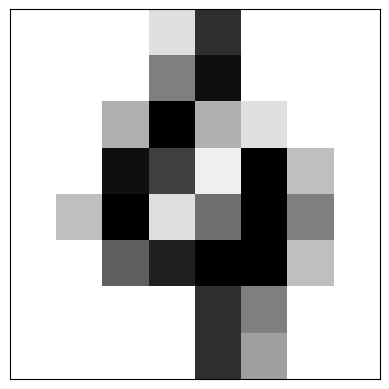

In [35]:
# display sample digit
sns.reset_orig() # Undo sns.set()
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False,
right=False, labelbottom=False, labelleft=False)
plt.imshow(digits.images[100], cmap=plt.cm.gray_r)
plt.show()

In [36]:
# make prediction for the digit
model.predict(digits.data[100].reshape(1,-1))[0]

4

In [37]:
# show probabilities
model.predict_proba(digits.data[100].reshape(1,-1))

array([[1.62905241e-11, 1.52818798e-07, 1.92471786e-21, 1.56306880e-21,
        9.99999845e-01, 4.40167021e-16, 2.06345051e-09, 1.24628557e-11,
        2.98555618e-13, 4.98619349e-20]])

In [38]:
# get probability for being a 4
model.predict_proba(digits.data[100].reshape(1,-1))[0][4]

0.9999998450886989